## OCR ESERCITAZIONE

Costruire un modello ibrido per il riconoscimento di caratteri (OCR).
1. Il modello deve comprendere almeno un layer convoluzionale in input e successivamente un layer ricorrente
2. Utilizza un layer Reshape tra la parte convoluzionale e lo strato ricorrente


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
emnist_train_path = './emnist_train.csv'
emnist_test_path = './emnist_test.csv'

In [3]:
train_df = pd.read_csv(emnist_train_path)

In [4]:
train_df.head()

,char,0,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,r,45,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,a,36,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,n,43,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,F,15,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
label_dict = {0: '0',
 1: '1',
 2: '2',
 3: '3',
 4: '4',
 5: '5',
 6: '6',
 7: '7',
 8: '8',
 9: '9',
 10: 'A',
 11: 'B',
 12: 'C',
 13: 'D',
 14: 'E',
 15: 'F',
 16: 'G',
 17: 'H',
 18: 'I',
 19: 'J',
 20: 'K',
 21: 'L',
 22: 'M',
 23: 'N',
 24: 'O',
 25: 'P',
 26: 'Q',
 27: 'R',
 28: 'S',
 29: 'T',
 30: 'U',
 31: 'V',
 32: 'W',
 33: 'X',
 34: 'Y',
 35: 'Z',
 36: 'a',
 37: 'b',
 38: 'd',
 39: 'e',
 40: 'f',
 41: 'g',
 42: 'h',
 43: 'n',
 44: 'q',
 45: 'r',
 46: 't'}

In [6]:
W, H=28,28
X_train = train_df.iloc[:,2:]
# X = train_df.drop(["char","0"],axis=1) #equivalente
X_train.head()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
def reshape_and_rotate(image):
    W = 28
    H = 28
    image = image.reshape(W, H)
    image = np.fliplr(image)
    image = np.rot90(image)
    return image

In [8]:
sample_image = train_df.iloc[1,2:] #prima riga e le colonne da 2 in poi
# sample_label = train_df.iloc[1]['char'] #equivalente
sample_label = train_df['char'][1]
sample_image.shape,sample_label

((784,), 'a')

In [9]:
print(X_train.shape) #flatten images
X_train = np.apply_along_axis(reshape_and_rotate, 1, X_train.values.astype('float32'))
X_train = X_train / 255 #scaling tra 0 e 1
print(X_train.shape) #reconstructed images

y_train = train_df["0"].values

(112800, 784)
(112800, 28, 28)


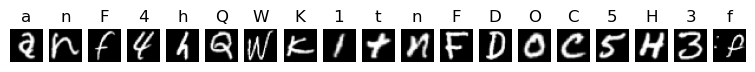

In [10]:
plt.figure(figsize=(10,10))
for i in range(1,20):
    plt.subplot(1,20,i)
    plt.imshow(X_train[i].reshape(28, 28), cmap=plt.cm.gray)
    plt.title(train_df.iloc[i]['char'])
    plt.axis('off')

In [15]:
from tensorflow.keras.layers import\
InputLayer, Conv2D, MaxPool2D, Flatten, LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.backend import clear_session

clear_session()
model = Sequential()
model.add(InputLayer(shape=(28,28,1)))
model.add(Conv2D(filters=20,
                 kernel_size=(7,7),
                padding="same",
                activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))
model.add(Conv2D(filters=30,
                kernel_size=(3,3),
                padding="valid",
                activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))
model.add(Conv2D(filters=50,
                kernel_size=(3,3),
                padding="valid",
                activation='relu'))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(len(label_dict),activation='softmax'))

#perchè mettere layer ricorrente???
model.summary()



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 20)     │         1,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 20)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 12, 12, 30)     │         5,430 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 30)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 50)       │        13,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │        80,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 47)             │         4,747 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,827 (409.48 KB)

 Trainable params: 104,827 (409.48 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [17]:
history = model.fit(X_train,y_train,batch_size=128,
          epochs=15,
         validation_split=0.25)

Epoch 1/15
661/661 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.5312 - loss: 1.7059 - val_accuracy: 0.8149 - val_loss: 0.5536
Epoch 2/15
661/661 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.8268 - loss: 0.5233 - val_accuracy: 0.8390 - val_loss: 0.4518
Epoch 3/15
661/661 ━━━━━━━━━━━━━━━━━━━━ 13s 19ms/step - accuracy: 0.8545 - loss: 0.4212 - val_accuracy: 0.8482 - val_loss: 0.4278
Epoch 4/15
661/661 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - accuracy: 0.8673 - loss: 0.3781 - val_accuracy: 0.8599 - val_loss: 0.3889
Epoch 5/15
661/661 ━━━━━━━━━━━━━━━━━━━━ 13s 19ms/step - accuracy: 0.8782 - loss: 0.3375 - val_accuracy: 0.8639 - val_loss: 0.3860
Epoch 6/15
661/661 ━━━━━━━━━━━━━━━━━━━━ 14s 21ms/step - accuracy: 0.8835 - loss: 0.3180 - val_accuracy: 0.8607 - val_loss: 0.3726
Epoch 7/15
661/661 ━━━━━━━━━━━━━━━━━━━━ 13s 19ms/step - accuracy: 0.8897 - loss: 0.2976 - val_accuracy: 0.8703 - val_loss: 0.3616
Epoch 8/15
661/661 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.8943 - loss: 0.2842 - 

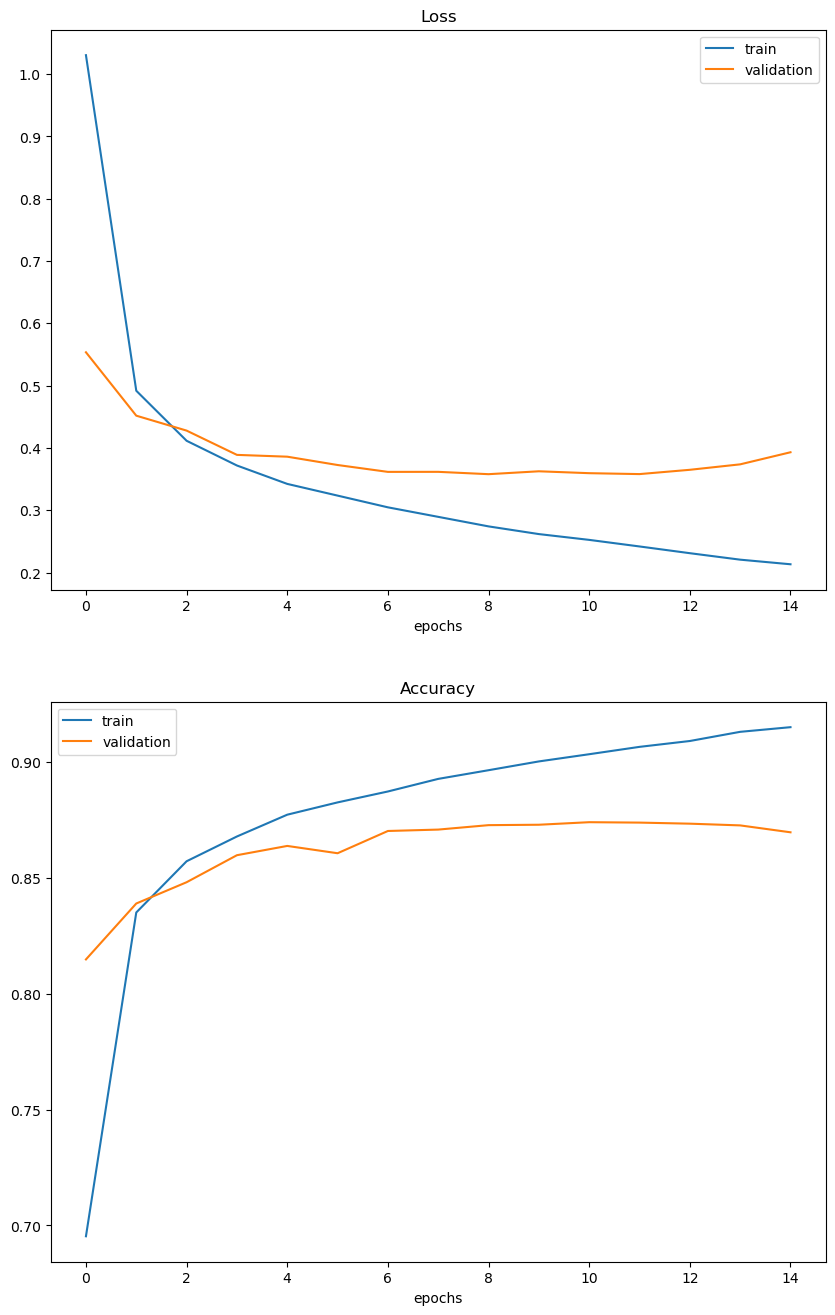

In [18]:
plt.figure(figsize=(10,16))
plt.subplot(2,1,1)
plt.plot(history.history["loss"],label="train")
plt.plot(history.history["val_loss"],label="validation")
plt.legend()
plt.xlabel("epochs")
plt.title("Loss")
plt.subplot(2,1,2)
plt.plot(history.history["accuracy"],label="train")
plt.plot(history.history["val_accuracy"],label="validation")
plt.legend()
plt.xlabel("epochs")
plt.title("Accuracy")
plt.show()

In [19]:
test_df = pd.read_csv(emnist_test_path)
X_test = test_df.iloc[:,2:]
X_test = np.apply_along_axis(reshape_and_rotate, 1, X_test.values.astype('float32'))
X_test = X_test / 255 #scaling tra 0 e 1
print(X_test.shape) #reconstructed images

y_test = test_df["0"].values

(18800, 28, 28)


In [24]:
from sklearn.metrics import accuracy_score

y_pred = np.argmax(model.predict(X_test),1)
print(y_pred.shape)
print(f"Test accurcacy: {accuracy_score(y_test,y_pred)}")

588/588 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


(18800,)

In [34]:
y_pred_words = [label_dict[idx] for idx in y_pred]
y_test_words = test_df["char"].values

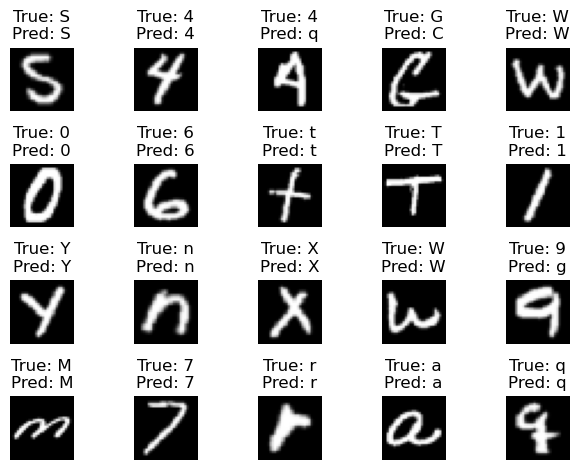

In [47]:
plt.figure()
random_indexes = np.random.choice(X_test.shape[0],size=20,replace=False)
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.title(f"True: {y_test_words[random_indexes[i]]}\nPred: {y_words[random_indexes[i]]}")
    plt.imshow(X_test[random_indexes[i]],cmap="gray")
    plt.axis("off")
plt.tight_layout()
plt.show()
    